In [1]:
import requests
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
from urllib import parse
import pandas as pd

In [2]:
url = 'https://www.worldometers.info/coronavirus/'

In [4]:
html_text = requests.get(url).text

'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>COVID Live Update: 144,133,088 Cases and 3,064,673 Deaths from the Coronavirus - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<link rel="apple-tou
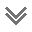

In [5]:
#html_text

In [6]:
tree = BeautifulSoup(html_text, "html.parser")


<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live Update: 144,133,088 Cases and 3,064,673 Deaths from the Coronavirus - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon
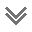

In [7]:
#tree

In [8]:
cols = tree.find('thead').find_all('th')

In [9]:
len(cols)

19

In [10]:
columns = []
for col in cols:
    columns.append(col.text)

In [11]:
lines1 = tree.find('tbody').find_all('tr',{'style':''})
lines2 = tree.find('tbody').find_all('tr',{'style':'background-color:#F0F0F0'})
lines3 = tree.find('tbody').find_all('tr',{'style':'background-color:#EAF7D5'})

In [12]:
lines = lines1 + lines2 + lines3

In [13]:
data = []

for line in lines:
    row = []
    for l in line.find_all('td'):
        row.append(l.text)
    data.append(row)

In [14]:
df = pd.DataFrame(np.array(data), columns=columns)

In [15]:
#df

#          Country,Other   TotalCases  NewCases TotalDeaths NewDeaths  \
0                         World  144,133,088  +588,907   3,064,673    +7,692   
1      1                    USA   32,551,107   +14,637    582,665       +209   
2      2                  India   15,880,534  +271,530    184,168     +1,598   
3      3                 Brazil   14,050,885              378,530              
4      4                 France    5,339,920              101,597              
..   ...                    ...          ...       ...         ...       ...   
217  216             MS Zaandam            9                    2              
218  208  Saint Kitts and Nevis           44                                   
219  209              Greenland           31                                   
220  218       Marshall Islands            4                                   
221  220             Micronesia            1                                   

    TotalRecovered NewRecovered ActiveCases Serious,Critical Tot Cases/1M pop  \
0      122,586,006     +432,002  18,482,409          109,445           18,491   
1       25,108,546       +3,011   6,859,896           10,036           97,881   
2       13,405,177     +135,314   2,291,189            8,944           11,418   
3       12,561,689                1,110,666            8,318           65,729   
4        4,181,006                1,057,317            5,984           81,663   
..             ...          ...         ...              ...              ...   
217              7                        0                                     
218             44                        0                               822   
219             31                        0                               545   
220              4                        0                                67   
221              1                        0                                 9   

    Deaths/1M pop   TotalTests Tests/\n1M pop\n      Population  \
0           393.2                                                 
1           1,752  432,173,530        1,299,541    332,558,517    
2             132  271,053,392          194,881  1,390,864,355    
3           1,771   28,600,000          133,789    213,770,046    
4           1,554   72,873,077        1,114,447     65,389,433    
..            ...          ...              ...             ...   
217                                                               
218                     12,381          231,421         53,500    
219                     20,669          363,577         56,849    
220                                                     59,510    
221                                                    115,988    

             Continent 1 Caseevery X ppl 1 Deathevery X ppl 1 Testevery X ppl  
0                  All                \n                                       
1        North America                10                571                 1  
2                 Asia                88              7,552                 5  
3        South America                15                565                 7  
4               Europe                12                644                 1  
..                 ...               ...                ...               ...  
217                                                                            
218      North America             1,216                                    4  
219      North America             1,834                                    3  
220  Australia/Oceania            14,878                                       
221  Australia/Oceania           115,988                                       

[222 rows x 19 columns]

In [16]:
from datetime import date
today = date.today()
df.to_csv('%s.csv'% str(today))